In [1]:
import pandas as pd
import ast

In [2]:
def normalise_shape_size(width, height, width_to=1000):
    scale = width_to / width
    return int(width*scale), int(height*scale)



In [3]:
initial_d = pd.read_csv("fandom.csv")
initial_d["cars"] = initial_d["cars"].map(ast.literal_eval)
initial_d.head()

,stage,act,synopsis,plot,airdate,characters,cars,music
0,First_Stage,1,High school kid Takumi Fujiwara works at a gas...,The plot begins with a summer midnight scene o...,"Fuji TV: April 18, 1998","['Yuichi Tachibana', 'Takumi Fujiwara', 'Itsuk...","[Toyota Sprinter Trueno GT-APEX (AE86), 1994 T...","['around the world', 'm.o.v.e', 'Space Boy', '..."
1,First_Stage,2,When his boss reveals that the Eight-Six drive...,"While the Eight-Six performs an inertia drift,...","Fuji TV: April 25, 1998","['Keisuke Takahashi', 'Takumi Fujiwara\xa0', '...","[Toyota Sprinter Trueno GT-APEX (AE86), Mazda ...","['around the world', 'm.o.v.e', 'Be My Babe', ..."
2,First_Stage,3,Iketani’s out of commission for the race again...,"With Iketani's S13 totaled, the 4WD driver and...","Fuji TV: May 2, 1998","['Koichiro Iketani', 'Itsuki Takeuchi', 'Takum...","[Nissan Silvia K's (S13), Toyota Sprinter True...","['around the world', 'm.o.v.e', ""Don't Stop Th..."
3,First_Stage,4,The match between the SpeedStars and the RedSu...,NaN,"Fuji TV: May 9, 1998","['Keisuke Takahashi', 'Kenji', 'Koichiro Iketa...","[Mazda ɛ̃fini RX-7 Type R (FD3S), Nissan 180SX...","['around the world', 'm.o.v.e', 'Dance Around ..."
4,First_Stage,5,When Takumi stuns everyone with his skills in ...,NaN,"Fuji TV: May 16, 1998","['Keisuke Takahashi', 'Hiroshi Fumihiro', 'Ken...","[Mazda efini RX-7 Type R (FD3S), Toyota Sprint...","['around the world', 'm.o.v.e', 'Back On The R..."


In [4]:
synopsis_per_car = initial_d[["synopsis", "cars"]].explode("cars")

In [5]:
ae86 = synopsis_per_car[synopsis_per_car["cars"].str.contains("AE86")]

In [6]:
words = ae86["synopsis"].str.split(" ").explode().str.strip().str.replace(".", "")

In [7]:
with open("stop_words.txt") as f:
    stop_words = f.readlines()
    stop_words = [i.strip() for i in stop_words]
filtered_words = words[~words.index.isin(stop_words)]

filtered_words.values

array(['High', 'school', 'kid', ..., 'will', 'never', 'end'], dtype=object)

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


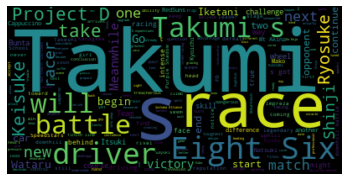

In [8]:
wc = WordCloud()
wc.generate(" ".join(filtered_words.values))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


In [12]:
from PIL import Image
import numpy as np

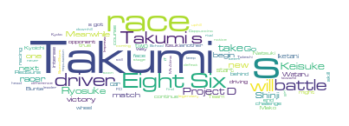

In [10]:
mask = np.array(Image.open("img/ae86_mask.jpg"))
font_path = 'MicrogrammaMedium.otf'

wc = WordCloud(mask=mask, 
    background_color="white",
    width=mask.shape[1],
    height=mask.shape[0],
    font_path=font_path,
)
wc.generate(" ".join(filtered_words.values))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()




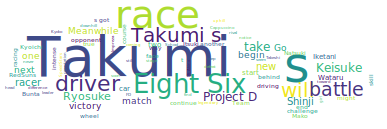

In [11]:
from IPython.display import SVG, display

SVG(data=wc.to_svg(embed_font=font_path))

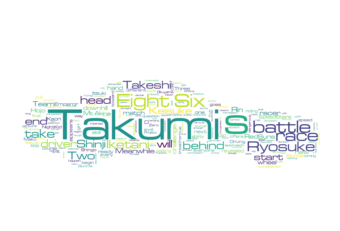

In [12]:
synopsis_per_car = initial_d[["synopsis", "cars"]].explode("cars")
r32 = synopsis_per_car[synopsis_per_car["cars"].str.contains("R32")]
words = r32["synopsis"].str.split(" ").explode().str.strip().str.replace(".", "")
with open("stop_words.txt") as f:
    stop_words = f.readlines()
    stop_words = [i.strip() for i in stop_words]
filtered_words = words[~words.index.isin(stop_words)]


mask = np.array(Image.open("img/r32_mask.jpg"))
font_path = 'MicrogrammaMedium.otf'

wc = WordCloud(mask=mask, 
    background_color="white",
    width=mask.shape[1],
    height=mask.shape[0],
    font_path=font_path,
)
wc.generate(" ".join(filtered_words.values))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


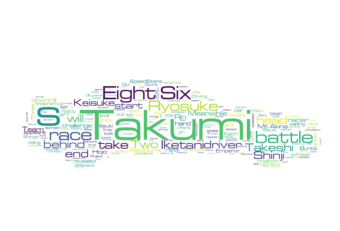

In [13]:
rx7 = synopsis_per_car[synopsis_per_car["cars"].str.contains("RX-7")]
rx7 = rx7["synopsis"].str.split(" ").explode().str.strip().str.replace(".", "")

with open("stop_words.txt") as f:
    stop_words = f.readlines()
    stop_words = [i.strip() for i in stop_words]
filtered_words = words[~words.index.isin(stop_words)]


mask = np.array(Image.open("img/r32_mask.jpg"))
font_path = 'MicrogrammaMedium.otf'

wc = WordCloud(mask=mask, 
    background_color="white",
    width=mask.shape[1],
    height=mask.shape[0],
    font_path=font_path,
)
wc.generate(" ".join(filtered_words.values))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


In [15]:
synopsis_per_car[synopsis_per_car["cars"].str.contains("RX-7")]


,synopsis,cars
0,High school kid Takumi Fujiwara works at a gas...,Mazda ɛ̃fini RX-7 Type R (FD3S)
0,High school kid Takumi Fujiwara works at a gas...,Mazda SAVANNA RX-7 Infini III (FC3S)
1,When his boss reveals that the Eight-Six drive...,Mazda ɛ̃fini RX-7 Type R (FD3S)
2,Iketani’s out of commission for the race again...,Mazda SAVANNA RX-7 ∞ III (FC3S)
2,Iketani’s out of commission for the race again...,Mazda ɛ̃fini RX-7 Type R (FD3S)
...,...,...
78,Takumi and Shinji continue with their match wh...,Mazda efini RX-7 Type R (FD3S)
78,Takumi and Shinji continue with their match wh...,Mazda efini RX-7 Type R (FD3S)
79,"Both drivers are equally strong, towards the m...",Mazda efini RX-7 Type R (FD3S)
80,The intense downhill battle between the two dr...,Mazda efini RX-7 Type R (FD3S)


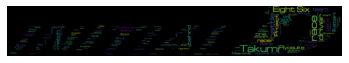

In [13]:
all_cars = initial_d["synopsis"].str.split(" ").explode().str.strip().str.replace(".", "")

with open("stop_words.txt") as f:
    stop_words = f.readlines()
    stop_words = [i.strip() for i in stop_words]
filtered_words = words[~words.index.isin(stop_words)]


mask = np.array(Image.open("img/initial_d_mask.png"))
font_path = 'MicrogrammaMedium.otf'

width, height = normalise_shape_size(mask.shape[1], mask.shape[0])

wc = WordCloud(mask=mask, 
    # background_color="white",
    width=width,
    height=height,
    font_path=font_path,
    contour_width=2,
    relative_scaling=0,
    min_word_length=3,
    # mode="RGBA",
    background_color=None,
)
wc.generate(" ".join(all_cars.values))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()




In [14]:
with open("assignment2/public/images/initial_d_word_cloud.svg", "w") as f:
    f.write(wc.to_svg(embed_font="EuroStyle.ttf"))


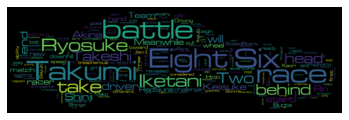

(1000, 315)

In [34]:
rx7 = synopsis_per_car[synopsis_per_car["cars"].str.contains("GTR")]
rx7 = rx7["synopsis"].str.split(" ").explode().str.strip().str.replace(".", "")

with open("stop_words.txt") as f:
    stop_words = f.readlines()
    stop_words = [i.strip() for i in stop_words]
filtered_words = words[~words.index.isin(stop_words)]


mask = np.array(Image.open("img/r32_mask.jpg"))
font_path = 'MicrogrammaMedium.otf'

width, height = normalise_shape_size(mask.shape[1], mask.shape[0])

wc = WordCloud(mask=mask, 
    # background_color="white",
    width=width,
    height=height,
    font_path=font_path,
    contour_width=2,
    relative_scaling=0,
    min_word_length=3,
    # mode="RGBA",
    background_color=None,
)
wc.generate(" ".join(filtered_words.values))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

with open("assignment2/public/images/gt-r_word_cloud.svg", "w") as f:
    f.write(wc.to_svg(embed_font="EuroStyle.ttf"))


width, height


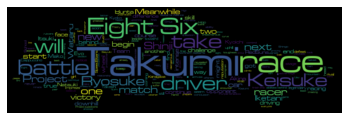

In [24]:
ae86 = synopsis_per_car[synopsis_per_car["cars"].str.contains("AE86")]
ae86 = ae86["synopsis"].str.split(" ").explode().str.strip().str.replace(".", "")

with open("stop_words.txt") as f:
    stop_words = f.readlines()
    stop_words = [i.strip() for i in stop_words]
filtered_words = words[~words.index.isin(stop_words)]


mask = np.array(Image.open("img/ae86_mask.jpg"))
font_path = 'MicrogrammaMedium.otf'

width, height = normalise_shape_size(mask.shape[1], mask.shape[0])

wc = WordCloud(mask=mask, 
    width=width,
    height=height,
    font_path=font_path,
    contour_width=2,
    relative_scaling=0,
    min_word_length=3,
    background_color=None,
)
wc.generate(" ".join(filtered_words.values))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

with open("assignment2/public/images/AE86_word_cloud.svg", "w") as f:
    f.write(wc.to_svg(embed_font="EuroStyle.ttf"))

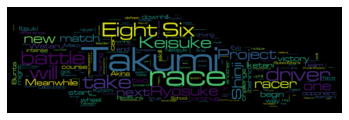

In [22]:
rx7 = synopsis_per_car[synopsis_per_car["cars"].str.contains("RX-7")]
rx7 = rx7["synopsis"].str.split(" ").explode().str.strip().str.replace(".", "")

with open("stop_words.txt") as f:
    stop_words = f.readlines()
    stop_words = [i.strip() for i in stop_words]
filtered_words = words[~words.index.isin(stop_words)]


mask = np.array(Image.open("img/rx7_mask.jpg"))
font_path = 'MicrogrammaMedium.otf'

width, height = normalise_shape_size(mask.shape[1], mask.shape[0])

wc = WordCloud(mask=mask, 
    width=width,
    height=height,
    font_path=font_path,
    contour_width=2,
    relative_scaling=0,
    min_word_length=3,
    background_color=None,
)
wc.generate(" ".join(filtered_words.values))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

with open("assignment2/public/images/RX-7_word_cloud.svg", "w") as f:
    f.write(wc.to_svg(embed_font="EuroStyle.ttf"))

In [34]:
initial_d["cars"].explode().value_counts()[0:10]

Toyota Sprinter Trueno GT-APEX (AE86)                   72
Mazda efini RX-7 Type R (FD3S)                          48
Nissan Skyline GT-R V-Spec II (BNR32)                   27
Mazda SAVANNA RX-7 ∞ III (FC3S)                         26
Nissan 180SX Type II (RPS13)                            25
Nissan Silvia K's (S13)                                 23
Toyota Corolla Levin SR (AE85)                          22
Toyota Corolla Levin GT-APEX (AE86)                     15
Subaru Impreza WRX STi Coupe Type R Version V (GC8D)    11
Nissan Silvia Q's (S14)                                 11
Name: cars, dtype: int64

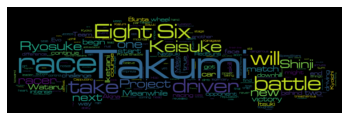

In [35]:
s13 = synopsis_per_car[synopsis_per_car["cars"].str.contains("S13")]
s13 = s13["synopsis"].str.split(" ").explode().str.strip().str.replace(".", "")

with open("stop_words.txt") as f:
    stop_words = f.readlines()
    stop_words = [i.strip() for i in stop_words]
filtered_words = words[~words.index.isin(stop_words)]


mask = np.array(Image.open("img/s13-mask.jpg"))
font_path = 'MicrogrammaMedium.otf'

width, height = normalise_shape_size(mask.shape[1], mask.shape[0])

wc = WordCloud(mask=mask, 
    width=width,
    height=height,
    font_path=font_path,
    contour_width=2,
    relative_scaling=0,
    min_word_length=3,
    background_color=None,
)
wc.generate(" ".join(filtered_words.values))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

with open("assignment2/public/images/S13_word_cloud.svg", "w") as f:
    f.write(wc.to_svg(embed_font="EuroStyle.ttf"))

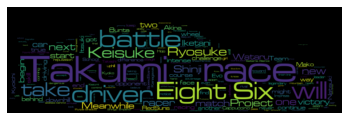

In [36]:
s13 = synopsis_per_car[synopsis_per_car["cars"].str.contains("180SX")]
s13 = s13["synopsis"].str.split(" ").explode().str.strip().str.replace(".", "")

with open("stop_words.txt") as f:
    stop_words = f.readlines()
    stop_words = [i.strip() for i in stop_words]
filtered_words = words[~words.index.isin(stop_words)]


mask = np.array(Image.open("img/180SX.jpg"))
font_path = 'MicrogrammaMedium.otf'

width, height = normalise_shape_size(mask.shape[1], mask.shape[0])

wc = WordCloud(mask=mask, 
    width=width,
    height=height,
    font_path=font_path,
    contour_width=2,
    relative_scaling=0,
    min_word_length=3,
    background_color=None,
)
wc.generate(" ".join(filtered_words.values))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

with open("assignment2/public/images/180SX_word_cloud.svg", "w") as f:
    f.write(wc.to_svg(embed_font="EuroStyle.ttf"))